In [ ]:
import sys
sys.path.append(r'C:\Users\akshay.raghuraman\Desktop\NIRFASTerFF\nirfaster-FF-main')
sys.path.append(r'C:\Users\akshay.raghuraman\Desktop\NIRFASTerFF\nirfaster-FF-main\Works\sensitivity')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import Mymesh 

In [2]:
# This code is mostly for creating a mua map of the the new added absorber with mua=0.02 at the desired location and 0.01 elsewhere. 
# For the calculation of the mua-difference multiplied with the US-Jacobian, we just have to take the difference of the mua(ie by putting 0.01 at desired locations and 0's elsewhere) and multiply it with the US-Jacobian. That is done in "line scan.ipynb"




dia_ab = 6    #diameter of spherical absorber

x_cen_ab,y_cen_ab,z_cen_ab = [15,30,40]      #centre of the absorber
dist_ab = np.sqrt(np.square((Mymesh.mesh.nodes[:,0]-x_cen_ab)) + np.square((Mymesh.mesh.nodes[:,1]-y_cen_ab)) + np.square((Mymesh.mesh.nodes[:,2]-z_cen_ab)))

ind_ab = dist_ab < dia_ab/2

mua_selection = np.where(ind_ab)

Mymesh.mesh.mua[mua_selection] = 0.02            # the mua is modified here insted of the main code. Because we dont want this mua during the calculation the jacobian itself. The absorber position, and the node selection is done in the main code, but the mua is not modified in the main code as mentioned



In [3]:
#Mymesh.mesh.mua[Mymesh.mua_selection] = 0.02

tmp1 = Mymesh.mesh.vol.mesh2grid@Mymesh.mesh.mua     #mesh to grid space


#reshaping matrices for matrix multiplication
print("tmp1 shape", tmp1.shape)                           #grid space   #original shape
print("tmp1 reshaped:", tmp1.reshape(1,-1).shape)         #grid space
print("J_md shape:",Mymesh.J_md.shape)                    #grid space   #original shape
print("J_md reshaped:", Mymesh.J_md.reshape(-1,1).shape)  #grid space


#print(Mymesh.mua_selection)      #node space
#print(Mymesh.mesh.mua[10715])    #node space

tmp1 shape (1728000,)
tmp1 reshaped: (1, 1728000)
J_md shape: (1, 1728000)
J_md reshaped: (1728000, 1)


(120, 120, 120)


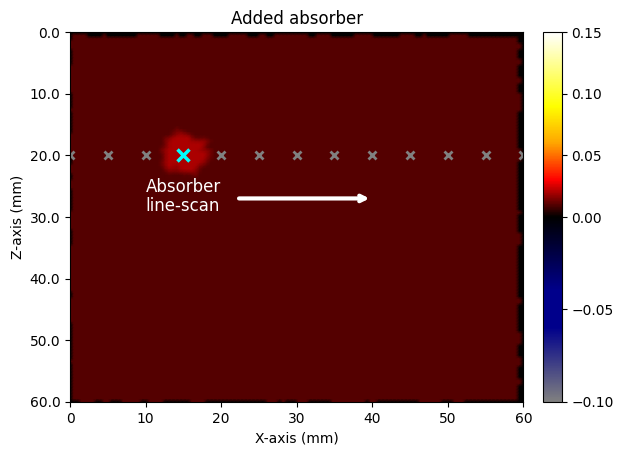

In [4]:
tmp1 = tmp1.reshape((Mymesh.xgrid.size, Mymesh.ygrid.size, Mymesh.zgrid.size), order='f')
print(tmp1.shape)

#plot
norm = mcolors.TwoSlopeNorm(vmin=-1e-1, vcenter=0, vmax=1.5e-1)

# Create a custom colormap
cmap_colors = [
    (0, "grey"),  
    (0.2, "darkblue"),
    (0.3, "darkblue"),
    (0.5, "black"),     
    (0.6, "red"),    
    (0.7, "orange"),      
    (0.8, "yellow"),
    (1.0, "white")     
]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot_blue", cmap_colors, N=500)


# Plot using `pcolormesh` for smooth shading
X, Z = np.meshgrid(np.linspace(0, 60, tmp1.shape[1]),  
                   np.linspace(0, 60, tmp1.shape[2]))
h = plt.pcolormesh(X, Z, tmp1[60, :, :].T, cmap=custom_cmap, norm=norm, shading='gouraud')

# Add colorbar
plt.colorbar(h, fraction=0.046, pad=0.04)


#Invert z axis
yticks = plt.gca().get_yticks()  # Get the original tick positions
plt.gca().set_yticks(yticks)  # Set them back
plt.gca().set_yticklabels(yticks[::-1])

# Add a horizontal arrow at z = 20 mm, pointing along x-axis
plt.annotate("",
             xy=(40, 33),       # Arrow tip (right side)
             xytext=(22, 33),   # Arrow tail (left side)
             arrowprops=dict(arrowstyle='->', color='white', lw=3))

# to mark "x" on the plot
plt.plot(0, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(5, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(10, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(15, 40, marker='x', color='cyan', markersize=8, markeredgewidth=2.5)
plt.plot(20, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(25, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(30, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(35, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(40, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(45, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(50, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(55, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(60, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)

# Optional: Add label near the arrow
plt.text(10, 34, "Absorber", color='white', fontsize=12)
plt.text(10, 31, "line-scan", color='white', fontsize=12)


# Show plot
plt.xlabel("X-axis (mm)")
plt.ylabel("Z-axis (mm)")
plt.title("Added absorber")
plt.show()

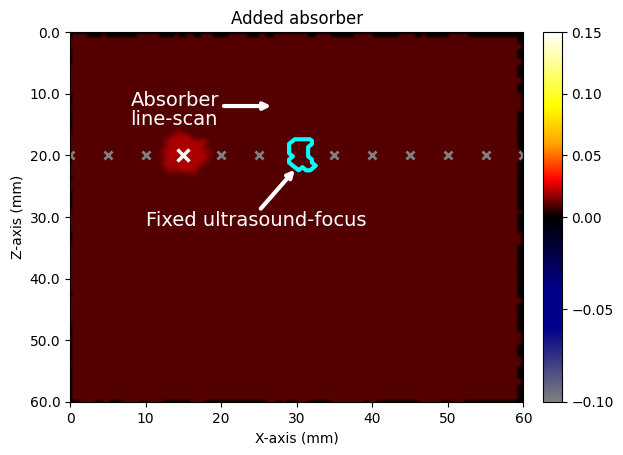

In [5]:
#Include the US-patch-boundary on the mua-map


# plotting the US position

tmp3= np.zeros(len(Mymesh.mesh.nodes))
tmp3[Mymesh.selection] = 1
tmp4 = Mymesh.mesh.vol.mesh2grid@tmp3     # mesh to grid interpolation 

tmp4 = tmp4.reshape(1,-1)          # Reshaped to look similiar to a jacobian, shape: (1, 1728000)
tmp5 = (tmp4>0.9)                  # tmp5 holds "True" for array values >0.8.  
indices = np.where(tmp5)[0]        # selection of all indices whose the threshold is >0.8 , or points corresponding to nodes that has an ultrasound pressure value assigned


tmp6 = np.zeros_like(tmp4)
tmp6[indices] = tmp4[indices]

us = tmp6.reshape((Mymesh.xgrid.size, Mymesh.ygrid.size, Mymesh.zgrid.size), order='f') 






#plot
X, Z = np.meshgrid(np.linspace(0, 60, tmp1.shape[1]),  
                   np.linspace(0, 60, tmp1.shape[2]))

fig, ax = plt.subplots()

us_patch = us[60, :, :].T
us_mask = (us_patch > 0.1 * us_patch.max()).astype(float)
ax.pcolormesh(X, Z, us_mask, cmap='gray', shading='gouraud', alpha=1)


norm = mcolors.TwoSlopeNorm(vmin=-1e-1, vcenter=0, vmax=1.5e-1)

# Create a custom colormap
cmap_colors = [
    (0, "grey"),  
    (0.2, "darkblue"),
    (0.3, "darkblue"),
    (0.5, "black"),     
    (0.6, "red"),    
    (0.7, "orange"),      
    (0.8, "yellow"),
    (1.0, "white")     
]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot_blue", cmap_colors, N=500)

#plot []"change in abs" x MD-Jacobian]
h = ax.pcolormesh(X, Z, tmp1[60, :, :].T, cmap=custom_cmap, norm=norm, shading='gouraud')

# 3. Draw a bright boundary around the ORIGINAL mask — no dilation
contour = ax.contour(X, Z, us_mask, levels=[0.5], colors='cyan', linewidths=3)



# Add colorbar
plt.colorbar(h, fraction=0.046, pad=0.04)


#Invert z axis
yticks = plt.gca().get_yticks()  # Get the original tick positions
plt.gca().set_yticks(yticks)  # Set them back
plt.gca().set_yticklabels(yticks[::-1])

# Add a horizontal arrow at z = 20 mm, pointing along x-axis
plt.annotate("",
             xy=(27, 48),       # Arrow tip (right side)          #for "Absober linescan"
             xytext=(20, 48),   # Arrow tail (left side)
             arrowprops=dict(arrowstyle='->', color='white', lw=3))

# to mark "x" on the plot
plt.plot(0, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(5, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(10, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(15, 40, marker='x', color='white', markersize=8, markeredgewidth=2.5)
plt.plot(20, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(25, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
#plt.plot(30, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(35, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(40, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(45, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(50, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(55, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)
plt.plot(60, 40, marker='x', color='grey', markersize=6, markeredgewidth=2)

# Optional: Add label near the arrow
plt.text(8, 48, "Absorber", color='white', fontsize=14)
plt.text(8, 45, "line-scan", color='white', fontsize=14)


# Add a horizontal arrow at z = 20 mm, pointing along x-axis
plt.annotate("",
             xy=(30, 38),       # Arrow tip (right side)
             xytext=(25, 31),   # Arrow tail (left side)
             arrowprops=dict(arrowstyle='->', color='white', lw=3))

# Optional: Add label near the arrow
plt.text(10, 28.5, "Fixed ultrasound-focus", color='white', fontsize=14)


# Show plot
plt.xlabel("X-axis (mm)")
plt.ylabel("Z-axis (mm)")
plt.title("Added absorber")
plt.show()
